In [108]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from utils.lib_2 import *

import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy.integrate import trapz
from time import time

plt.style.use('default')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({'font.size': 24})

from jupyterthemes import jtplot
# jtplot.style()
jtplot.style(theme='grade3')


def tilted_liouvillian(H, L, chi, v):
    '''
    Compute the tilted liouvillian for a single jump operator

    Parameters
    ----------
    H : qobj
        The Hamiltonian of the system
    L : qobj
        The jump operator
    chi : float 
        The value of the counting field
    v : float
        The value of the counting field

    Returns
    -------
    L_tilt : qobj
        The tilted liouvillian
    '''
    
    # Only works for one jump operator
    L_vec = liouvillian(H, [L])
    L_tilt = L_vec + 1j*chi * ( spre(L) + spost(L.dag()) ) - (chi**2 / (2))
    
    return L_tilt

# We can pass this tilted liouvillian to the mesolve function
def solve_tilted_liouvillian(H, L, chi_list, v, psi0, t):
    '''

    Solve the Titlted Liouvillian for a single operator using mesolve

    Parameters
    ----------
    H : qobj
        The Hamiltonian of the system
    L : qobj
        The jump operator
    chi_list : list
        The list of chi values for the counting field
    v : float
        The value of the counting field
    psi0 : qobj
        The initial state of the system
    t : list
        The time list   
    
    Returns
    -------
    pchis : list
        The list of pchi values for each chi value as a function of time 
    '''
    
    # Initialize the list of pchi values
    pchis = np.zeros((len(chi_list), len(t)))

    # Loop over the chi values
    for i, chi in enumerate(chi_list):
        # Define the tilted liouvillian
        L_tilt = tilted_liouvillian(H, L, chi, v)
        output = mesolve(L_tilt, psi0, t, [], [])
        pchis[i, :] = [rho.tr() for rho in output.states]
    
    return pchis

In [109]:
add_numbers(1, 2)

3

In this notebook, we want to compare the direct calculation of the tilted liouvillian to that using qutips mesolve function.

In [95]:
# Define system parameters
k = 0.5
Ω = 1

# useful operators
sz = sigmaz()
sx = sigmax()
sy = sigmay()
sm = sigmam()
sp = sigmap()

# Define dissipator
L = np.sqrt(k)*sm
c_ops = [L]

# Define system Hamiltonian
H = (Ω/2)*sx

# Define steadystate and convert to vector
rho_ss = steadystate(H, c_ops)
rho_ss_vec = operator_to_vector(rho_ss)

# Create time list for average and stochastic
t0 = 0
t1 = 3
dt = 0.1
t = np.arange(t0, t1, dt)

In [96]:
# Create chi space and compute tilted Liouvillians
dchi = 0.005
chi = np.arange(-20, 20, dchi)
# chi = [0]
# dchi = 1

# create tilted liouvillian
liouvs = [tilted_liouvillian(H, 1j*L, i, 1) for i in chi]

In [97]:
# Compute using direct method
start = time()
pchi_direct = np.zeros((len(chi), len(t)), dtype=complex)
for i, chi_i in enumerate(chi):
    L_i = (liouvs[i]*dt).expm()
    rho_temp = rho_ss_vec
    for j, t_j in enumerate(t):

        rho_new = L_i * rho_temp
        pchi_direct[i, j] = vector_to_operator(rho_new).tr()
        rho_temp = rho_new

end = time()
print('Direct method took {} seconds'.format(end-start))

Direct method took 27.495497941970825 seconds


In [98]:
# # Compute using mesolve
# start = time()
# rhochi = [mesolve(liou, to_super(rho_ss), t, [], []).states for liou in liouvs]
# pchi_mesolve = np.array([[rho.tr() for rho in rhoix] for rhoix in rhochi])
# end = time()

# print('mesolve method took {} seconds'.format(end-start))

In [99]:
# Now compute integral over n = 1
dn = 0.1
nvals = np.arange(-20, 20, dn)
Pnt_direct = np.real(np.array([trapz(np.exp(-1j*ni*chi)*pchi_direct.T, chi, dx=dchi, axis=1)/(2*np.pi) for ni in nvals]))*dn
Pnt_mesolve = np.real(np.array([trapz(np.exp(-1j*ni*chi)*pchi_mesolve.T, chi, dx=dchi, axis=1)/(2*np.pi) for ni in nvals]))*dn


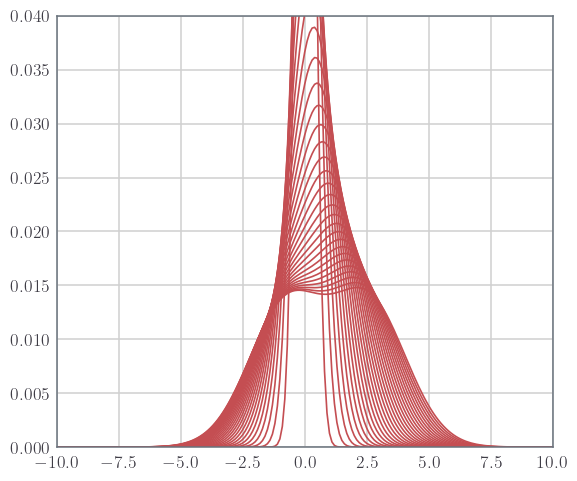

In [101]:
plt.plot(nvals, Pnt_direct, label='Direct', color='r')
# plt.plot(t, Pnt_mesolve[0, :], label='mesolve')
plt.ylim(0, 0.04)
plt.xlim(-10, 10)

plt.show()

In [86]:
np.sum(Pnt_direct, axis=0)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99999999,
       0.99999997, 0.99999984, 0.99999937, 0.9999979 , 0.99999388])

In [43]:
steadystate(liouvs[0])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-4.90686608e-01+0.j         -3.46944695e-18-0.00124044j]
 [-3.46944695e-18+0.00124044j  3.66766791e-03+0.j        ]]

In [32]:
test2.states[ix]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.44444444+0.j         0.        -0.22222222j]
 [0.        +0.22222222j 0.55555556+0.j        ]]

In [105]:
from tqdm import tqdm

for i in tqdm(range(100), desc="Processing data"):
    # Your code here
    pass


Processing data: 100%|██████████| 100/100 [00:00<00:00, 1426634.01it/s]
